In [67]:
# Check the Notebook
print("Hello World")

Hello World


In [68]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [69]:
# Load the Dataset
df = pd.read_csv('Dataset/babies.csv')
df

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0
...,...,...,...,...,...,...,...,...
1231,1232,113,275.0,1,27.0,60.0,100.0,0.0
1232,1233,128,265.0,0,24.0,67.0,120.0,0.0
1233,1234,130,291.0,0,30.0,65.0,150.0,1.0
1234,1235,125,281.0,1,21.0,65.0,110.0,0.0


In [70]:
df.shape

(1236, 8)

In [71]:
df.size

9888

In [72]:
df.duplicated().sum()

0

In [73]:
df.isna().sum()

case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64

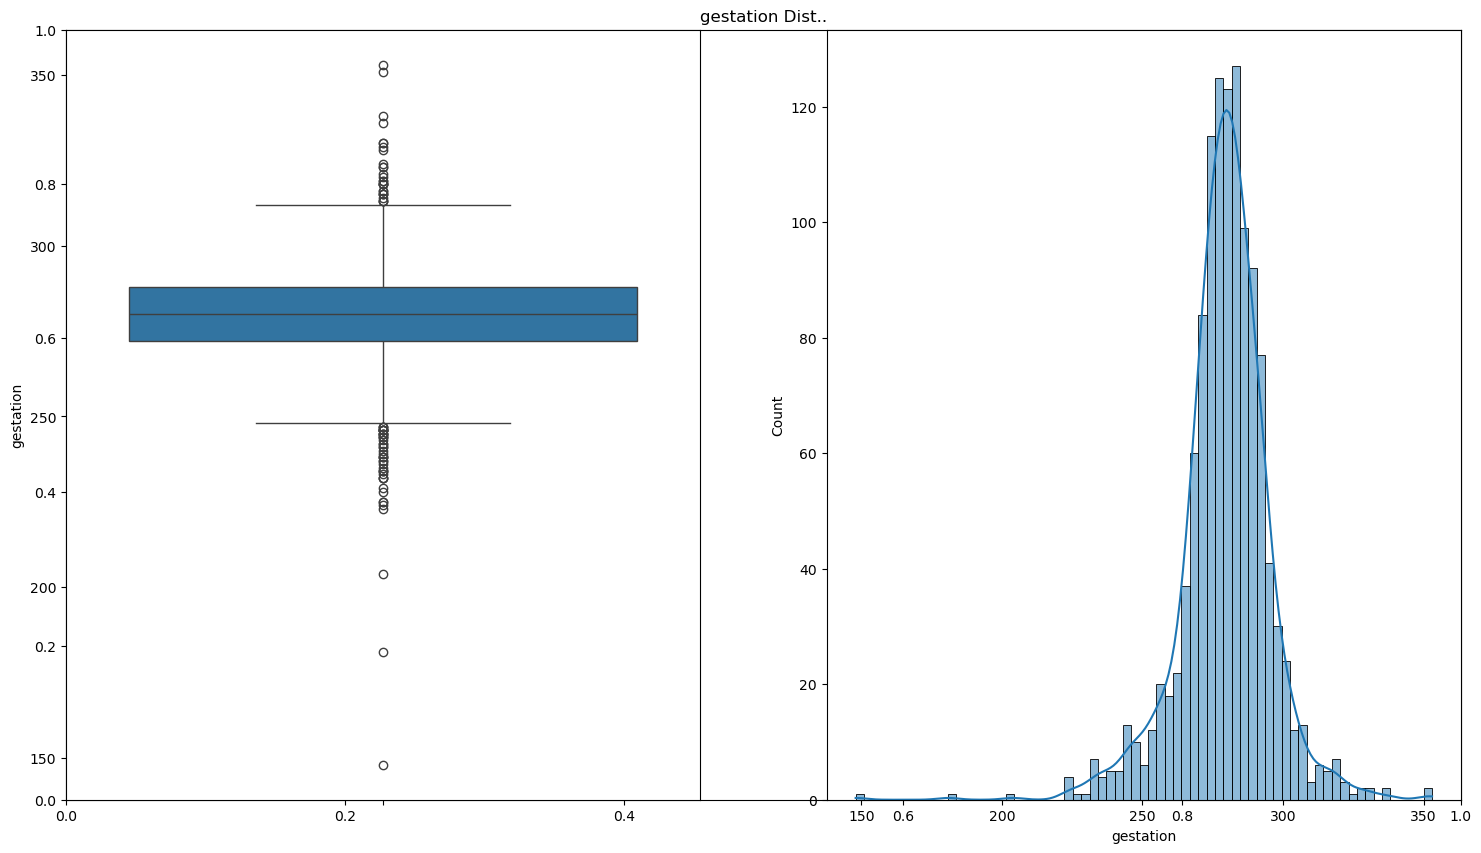

In [74]:
plt.figure(figsize=(18,10))
plt.title('gestation Dist..')
plt.subplot(1,2,1)
sns.boxplot(df['gestation'])
plt.subplot(1,2,2)
sns.histplot(df['gestation'], kde = True)
plt.show()

In [75]:
# gestation is right skewed data and there are lot of outliers present on the column, so we impute with median
df['gestation'] = df['gestation'].fillna(df['gestation'].median())

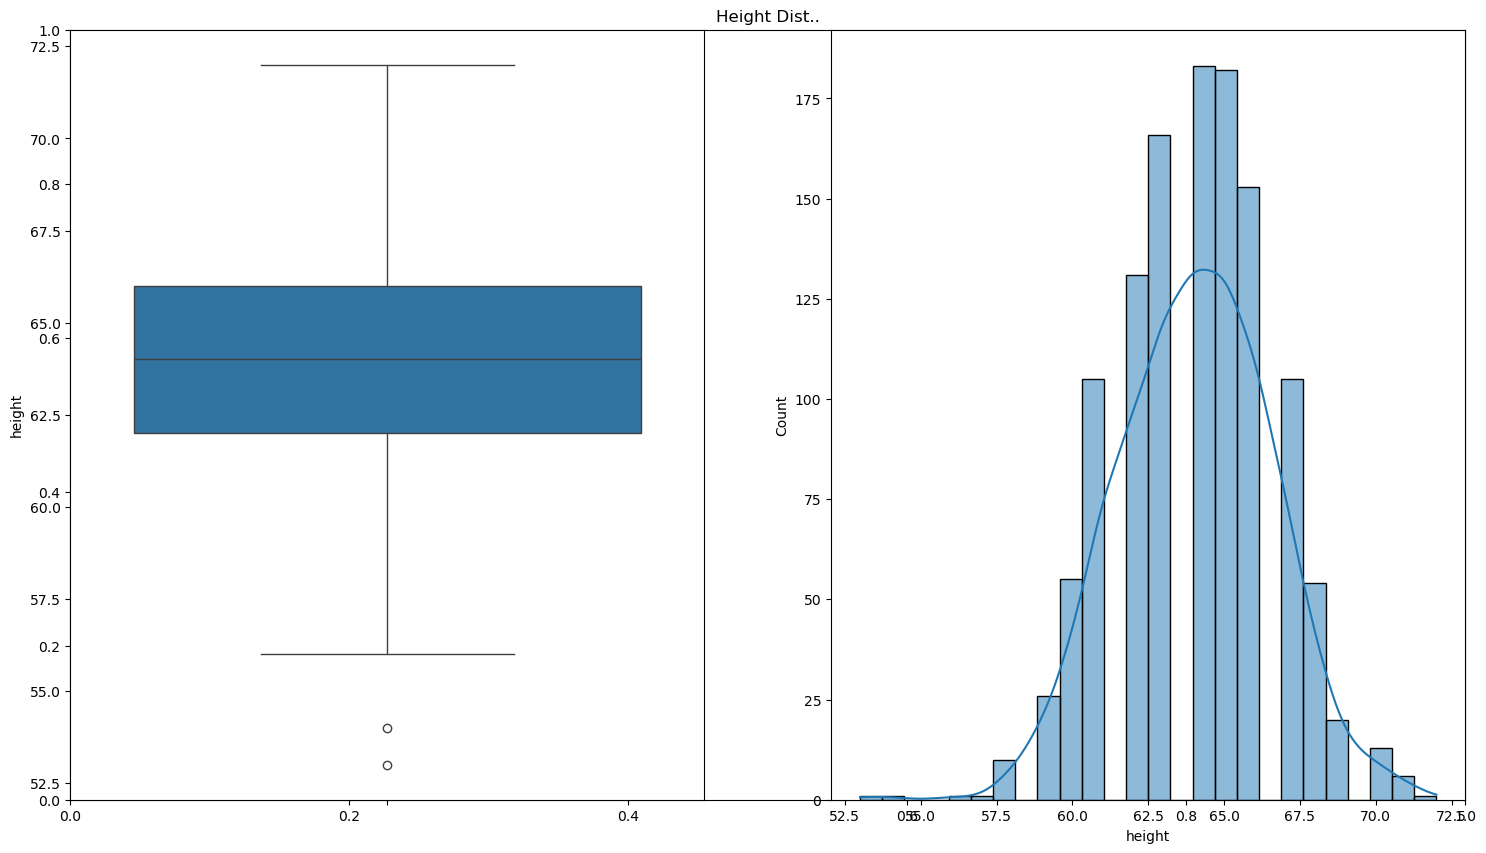

In [76]:
plt.figure(figsize=(18,10))
plt.title('Height Dist..')
plt.subplot(1,2,1)
sns.boxplot(df['height'])
plt.subplot(1,2,2)
sns.histplot(df['height'], kde = True)
plt.show()

In [77]:
# height is approx normally distt.. data and there are not much outliers present on the column, so we impute with mean
df['height'] = df['height'].fillna(df['height'].mean())

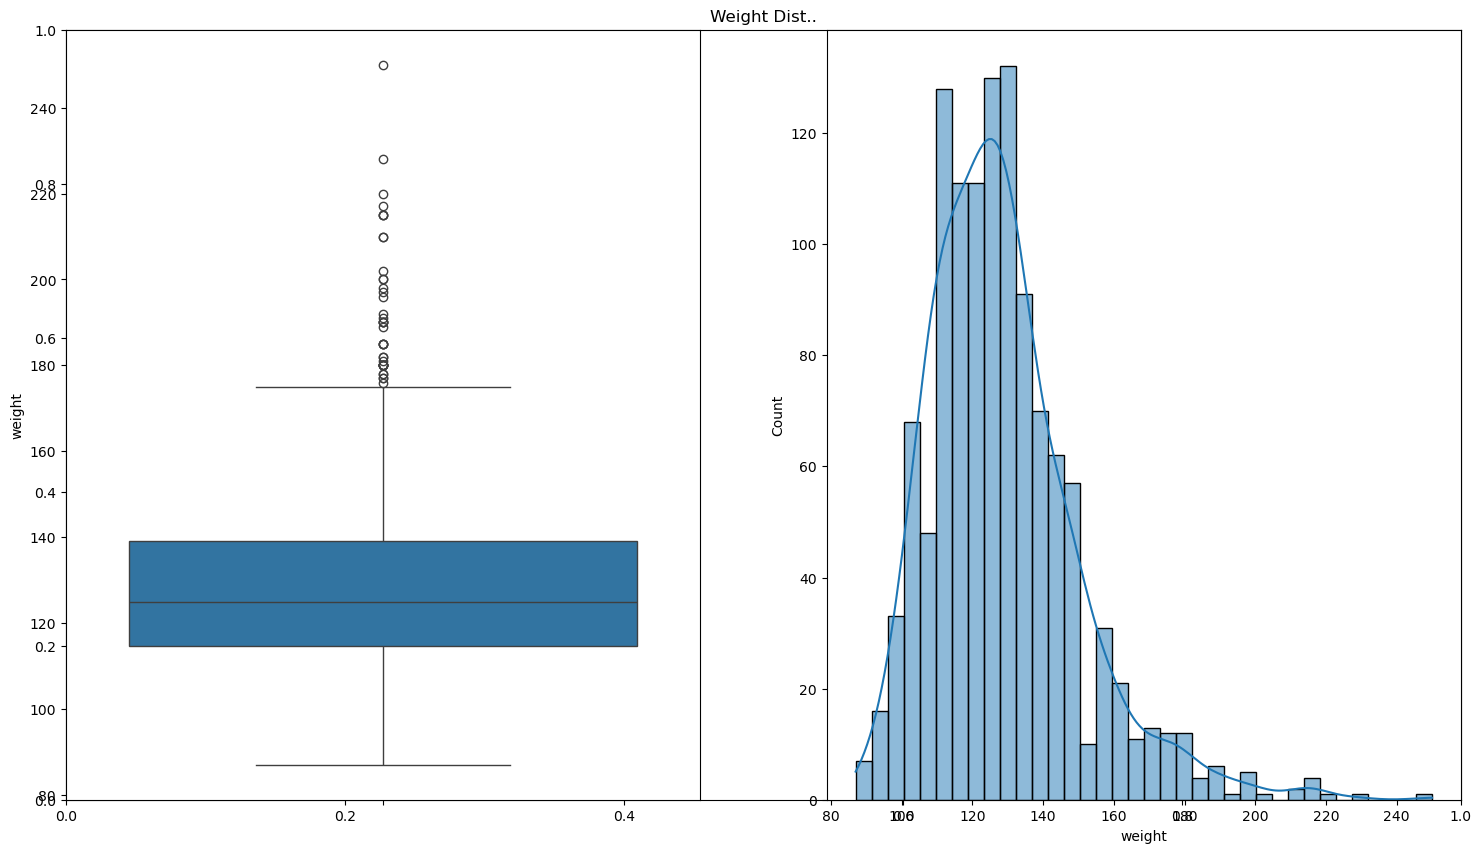

In [78]:
plt.figure(figsize=(18,10))
plt.title('Weight Dist..')
plt.subplot(1,2,1)
sns.boxplot(df['weight'])
plt.subplot(1,2,2)
sns.histplot(df['weight'], kde = True)
plt.show()

In [79]:
# height is right skewed. data and there are very much outliers present on the column, so we impute with median
df['weight'] = df['weight'].fillna(df['weight'].median())

In [80]:
df['smoke'].value_counts()

smoke
0.0    742
1.0    484
Name: count, dtype: int64

In [81]:
# we impute nan value with mode
df['smoke'] = df['smoke'].fillna(df['smoke'].mode())

In [82]:
df.isna().sum()

case          0
bwt           0
gestation     0
parity        0
age           2
height        0
weight        0
smoke        10
dtype: int64

In [83]:
df.dropna(inplace=True)

In [84]:
df.head()

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,280.0,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


In [85]:
df.drop('case', inplace=True, axis = 1)

In [86]:
df

,bwt,gestation,parity,age,height,weight,smoke
0,120,284.0,0,27.0,62.0,100.0,0.0
1,113,282.0,0,33.0,64.0,135.0,0.0
2,128,279.0,0,28.0,64.0,115.0,1.0
3,123,280.0,0,36.0,69.0,190.0,0.0
4,108,282.0,0,23.0,67.0,125.0,1.0
...,...,...,...,...,...,...,...
1231,113,275.0,1,27.0,60.0,100.0,0.0
1232,128,265.0,0,24.0,67.0,120.0,0.0
1233,130,291.0,0,30.0,65.0,150.0,1.0
1234,125,281.0,1,21.0,65.0,110.0,0.0


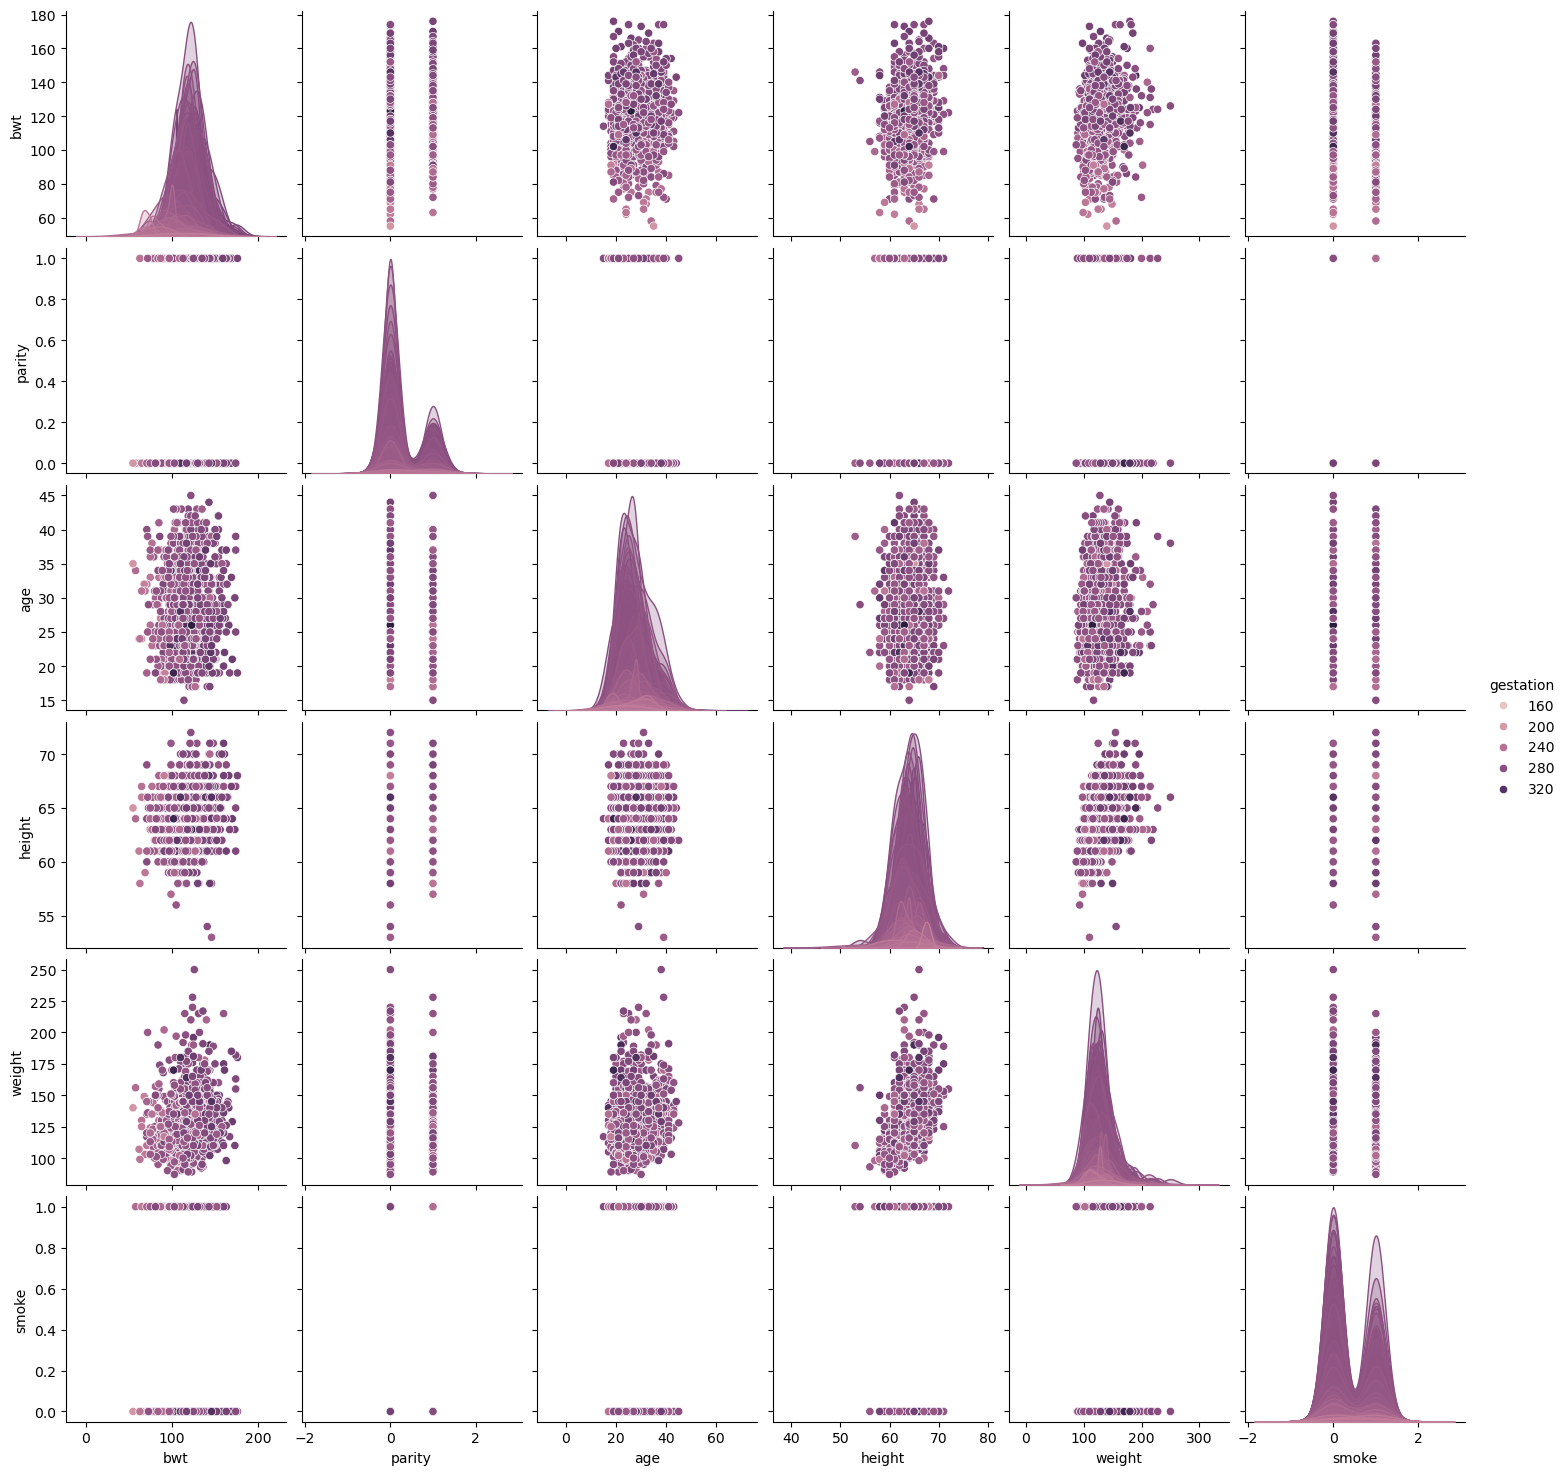

In [87]:
sns.pairplot(df, hue = 'gestation')

In [88]:
df.describe()

,bwt,gestation,parity,age,height,weight,smoke
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000
mean,119.520425,279.321078,0.256536,27.232026,64.046571,128.428105,0.394608
std,18.218118,15.985961,0.436900,5.789303,2.512014,20.627952,0.488966
min,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,108.750000,272.000000,0.000000,23.000000,62.000000,115.000000,0.000000
50%,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,131.000000,288.000000,1.000000,31.000000,66.000000,137.000000,1.000000
max,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


In [89]:
df.corr()['bwt'].sort_values(ascending=False)

bwt          1.000000
gestation    0.403048
height       0.199821
weight       0.152385
age          0.029632
parity      -0.044832
smoke       -0.240062
Name: bwt, dtype: float64

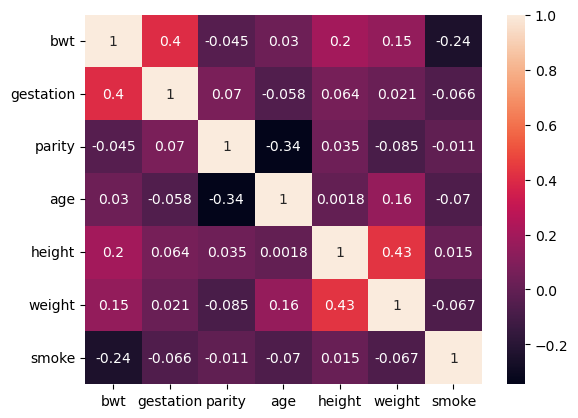

In [90]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [91]:
# Seperate x and y
x = df.drop('bwt', axis=1)
y = df['bwt']

In [92]:
x

,gestation,parity,age,height,weight,smoke
0,284.0,0,27.0,62.0,100.0,0.0
1,282.0,0,33.0,64.0,135.0,0.0
2,279.0,0,28.0,64.0,115.0,1.0
3,280.0,0,36.0,69.0,190.0,0.0
4,282.0,0,23.0,67.0,125.0,1.0
...,...,...,...,...,...,...
1231,275.0,1,27.0,60.0,100.0,0.0
1232,265.0,0,24.0,67.0,120.0,0.0
1233,291.0,0,30.0,65.0,150.0,1.0
1234,281.0,1,21.0,65.0,110.0,0.0


In [93]:
y

0       120
1       113
2       128
3       123
4       108
       ... 
1231    113
1232    128
1233    130
1234    125
1235    117
Name: bwt, Length: 1224, dtype: int64

In [94]:
# Train-test-split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [95]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((979, 6), (245, 6), (979,), (245,))

In [96]:
# Model Training
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [97]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_lr = lr.predict(x_test)

In [98]:
rid = Ridge(alpha=0.2)
rid.fit(x_train, y_train)
y_rid = rid.predict(x_test)

In [99]:
las = Lasso(alpha=0.2)
las.fit(x_train, y_train)
y_las = las.predict(x_test)

In [100]:
en = ElasticNet(alpha=0.2)
en.fit(x_train, y_train)
y_en = en.predict(x_test)

In [101]:
tree = DecisionTreeRegressor(criterion='absolute_error')
tree.fit(x_train, y_train)
y_tree = tree.predict(x_test)

In [102]:
svr = SVR()
svr.fit(x_train, y_train)
y_svr = svr.predict(x_test)

In [103]:
# Evaluation Metrix
from sklearn.metrics import r2_score, mean_squared_error
r2 = {"LinearRegression":r2_score(y_test, y_lr),
      "Ridge":r2_score(y_test, y_rid),
      "Lasso":r2_score(y_test, y_las),
      "ElasticNet":r2_score(y_test, y_en),
      "Deecision Tree": r2_score(y_test, y_tree),
      "SVM":r2_score(y_test, y_svr)}

mse = {"LinearRegression":mean_squared_error(y_test, y_lr),
      "Ridge":mean_squared_error(y_test, y_rid),
      "Lasso":mean_squared_error(y_test, y_las),
      "ElasticNet":mean_squared_error(y_test, y_en),
      "Deecision Tree": mean_squared_error(y_test, y_tree),
      "SVM":mean_squared_error(y_test, y_svr)}

In [104]:
print(f"The r2 of {r2}")
print(f"The MSE of {mse}")

The r2 of {'LinearRegression': 0.231330591119572, 'Ridge': 0.23131543205149896, 'Lasso': 0.23070631621327975, 'ElasticNet': 0.21889047693930186, 'Deecision Tree': -0.5948062349741781, 'SVM': 0.08406833370273181}
The MSE of {'LinearRegression': 267.3628261206495, 'Ridge': 267.3680988311731, 'Lasso': 267.5799648558381, 'ElasticNet': 271.68981513058674, 'Deecision Tree': 554.7142857142857, 'SVM': 318.5843953271295}


In [105]:
# The best Accurate Model is Linear Regression

In [106]:
# Save the Model
import pickle
pickle.dump(lr, open("Model/model.pkl", "wb"))

In [107]:
df

,bwt,gestation,parity,age,height,weight,smoke
0,120,284.0,0,27.0,62.0,100.0,0.0
1,113,282.0,0,33.0,64.0,135.0,0.0
2,128,279.0,0,28.0,64.0,115.0,1.0
3,123,280.0,0,36.0,69.0,190.0,0.0
4,108,282.0,0,23.0,67.0,125.0,1.0
...,...,...,...,...,...,...,...
1231,113,275.0,1,27.0,60.0,100.0,0.0
1232,128,265.0,0,24.0,67.0,120.0,0.0
1233,130,291.0,0,30.0,65.0,150.0,1.0
1234,125,281.0,1,21.0,65.0,110.0,0.0


In [114]:
data = {'gestation':[290],
 'parity':[1],
 'age':[28],
 'height':[65],
 'weight':[100],
 'smoke':[1]}

In [115]:
dt = pd.DataFrame(data)
dt

,gestation,parity,age,height,weight,smoke
0,290,1,28,65,100,1


In [116]:
model = pickle.load(open("Model/model.pkl","rb"))

In [117]:
model.predict(dt)

array([117.18461135])